# Twitter Airline Sentiment Analysis (ULMFiT)

## Introduction

This notebook explores the [Twitter US Airline Sentiment Dataset](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) and tries to predict tweet sentiment using a language model and RNN via Fast.ai's library for Universal Language Model Fine-tuning for Text Classification ([ULMFiT](http://nlp.fast.ai/classification/2018/05/15/introducting-ulmfit.html)).

## Setup

Importing packages.

In [1]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt

# Modeling, selection, and evaluation
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels

%matplotlib inline 

## Data Preparation

First we read in the data and have a look at the columns we can use and explore. 

In [2]:
df = pd.read_csv('../input/abstract-clusters/abstract_clusters.csv',encoding='utf-8',error_bad_lines=False,engine='python')

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)

In [4]:
df.dropna(inplace=True)

In [6]:
df_new.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

In [5]:
df_new=pd.df = pd.DataFrame({'label':df.Label, 'text':df.Abstract})

In [7]:
df_new.head()

,label,text
0,8,"Recently, we reported the discovery of a drome..."
1,7,BACKGROUND: Fomite mediated transmission can b...
2,5,"Balkan endemic nephropathy (BEN), originally d..."
3,3,A genomic cDNA library of RNA from Breda virus...
4,5,Severe acute respiratory syndrome (SARS) is an...


In [8]:
df_train, df_val_test = train_test_split(df_new, stratify = df_new['label'], test_size = 0.2, random_state = 12)

In [9]:
df_val, df_test = train_test_split(df_val_test, stratify = df_val_test['label'], test_size = 0.5, random_state = 12)

In [ ]:
# # Read file into dataframe
# pd.set_option('display.max_colwidth', -1)
# df = pd.read_csv('../input/Tweets.csv')
# df = df.reindex(np.random.permutation(df.index))  
# df.head()

Next we look at the distribution of the main dependent variable: airline_sentiment, and its breakdown across airlines and tweet length. 

In [ ]:
# df['airline_sentiment'].value_counts().plot(kind='bar')

In [ ]:
# df['airline'].value_counts().plot(kind='bar')

In [ ]:
# df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
# df['tweet_length'] = df['text'].apply(len)
# df.groupby(['tweet_length', 'airline_sentiment']).size().unstack().plot(kind='line', stacked=False)

We see that there isn't a lot of correlation between the number of positive / neutral tweets and the tweet length, but for negative tweets the distribution is heavily skewed towards longer tweets. This is possibly because the angier the tweeter, the more they have to say. Next we'll see if the same observation can be made about the average and median sentiment confidence as well.

In [ ]:
# df[['tweet_length', 'airline_sentiment', 'airline_sentiment_confidence']].groupby(['tweet_length', 'airline_sentiment']).mean().unstack().plot(kind='line', stacked=False)

In [ ]:
# df[['tweet_length', 'airline_sentiment', 'airline_sentiment_confidence']].groupby(['tweet_length', 'airline_sentiment']).median().unstack().plot(kind='line', stacked=False)

There doesn't seem to be a discernable relationship between the confidence and the tweet length. Next we randomize and split the data, then write to CSVs. 

In [ ]:
# test_percentage = 0.1
# df.sort_index(inplace=True)
# cutoff = int(test_percentage * df.shape[0])
df_train.to_csv('covid_train_new.csv', index=False, encoding='utf-8')
df_test.to_csv('covid_test_new.csv', index=False, encoding='utf-8')
# df[['text']][cutoff:].to_csv('Tweets_text_only_train.csv', index=False, encoding='utf-8')

### Tokenization

We read in the data and add new words to our dictionary, as well as create a representation of words using numbers. 

In [10]:
df_train.head()

,label,text
10829,0,Acute viral wheeze in children is a major caus...
30633,7,Summary Hand hygiene is an important component...
28720,5,BACKGROUND: Multiple sclerosis (MS) is charact...
5309,5,BACKGROUND: Cytomegalovirus (CMV) is the most ...
6824,6,The cytopathic effects of Zika virus (ZIKV) ar...


In [11]:
data_lm = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_val, path = "",bs=24)

In [12]:
data_lm.show_batch()

idx,text
0,"acute wheezing attending the only tertiary paediatric hospital in xxmaj perth , xxmaj australia . xxmaj the bacterial community from these samples was explored using next generation sequencing and compared to samples from 75 non - wheezing controls . xxmaj no significant difference in bacterial diversity was observed between samples from those with wheeze and healthy controls . xxmaj within the wheezing group , attendance at kindergarten or preschool was"
1,"variability may induce variations in pathogenesis . xxmaj this comparative analysis of the liver proteome modulated during infection with three different strains of xxup hev genotype 3 provides an important basis for further investigations on the factors involved in xxup hev replication and the mechanism of xxup hev pathogenesis . xxup importance xxmaj hepatitis e virus ( xxup hev ) is responsible for acute hepatitis , with clinical symptoms ranging"
2,"included in this study . xxmaj between xxmaj march 2010 and xxmaj february 2011 , xxup mrsa specimens were obtained for spa typing . xxup mrsa clusters were investigated using a retrospective temporal scan statistic . xxmaj tests were conducted on a monthly scale and significant clusters were compared to xxup mrsa outbreaks identified by hospital personnel . xxmaj associations between the rate of xxup mrsa cases and the variables"
3,"their intramolecular disulfide bonds . xxmaj sulfhydryl - containing polypeptides ( xxup xxunk , xxup p60 , xxup p100 , and xxup p33 ) were detected by xxunk , and the accessibility of these residues was analyzed after successive stripping of the xxup civ particle . xxmaj xxunk of external polypeptides by [ xxunk acid shows only one intensively labeled spot corresponding to the xxup p50 polypeptide , whereas xxup"
4,"control xxunk sirna had no effect . xxmaj we believe a sensitive positive readout pharmacodynamics reporter model will be of use to the research community in rnai - based vector development . xxbos abstractbats are unique among mammals due to the ability of powered flight and exceptional longevity . xxmaj they are also asymptomatic hosts for numerous viruses , including recently emerged zoonotic xxmaj henipaviruses xxmaj nipah and xxmaj hendra"


The following changes have been made to the text for ease of modeling:
- split on space and punctuation symbols
- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- there are several special tokens (all those that begin by xx), to replace unknown tokens (see below)

In [13]:
data_lm.save('data_lm.pkl')

In [ ]:
# data.vocab.itos[:10]

Looking into the dataset we can now see the current representation post-processing, in both text form and numerical.

In [ ]:
# print(data.train_ds[0][0])
# # print(data.train_ds[1][0])
# print(data.train_ds[2][0])

In [ ]:
# print(data.train_ds[0][0].data[:10])
# print(data.train_ds[1][0].data[:10])
# print(data.train_ds[2][0].data[:10])

## Language Model

We'll be using a language model provided from the fastai library and applying the pre-calculated weights from wikitext-103. This will provide a word embedding scheme that aligns with the corpus of airline tweets and will hopefully capture sufficient "meaning" in each word. The language model here will not be optimal as tweets sometimes do not obey conventional spelling and grammar, especially hastags. 

In [ ]:
# bs = 24
# seed = 333

First we ingest the data once again but have a 10% holdout only since we'll be using it to calibrate the language model. 

In [ ]:
# data_lm = (TextList.from_csv('.', 'Tweets_text_only_train.csv')
#             .random_split_by_pct(0.1, seed = seed)
#            #We randomly split and keep 10% for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data_lm.pkl')

In [ ]:
# # data_lm = load_data(path, 'data_lm.pkl', bs=bs)
# data_lm.show_batch()

Now we define the language model and set the learning rates. 

In [14]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


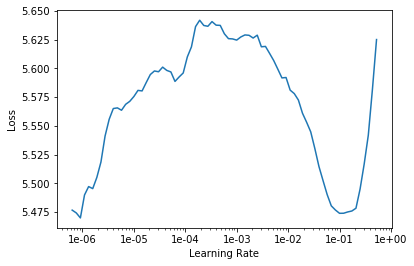

In [16]:
learn.recorder.plot(skip_end=15)

Next we fit the model for a few cycles by running 1 epoch and then unfreezing and running more epochs to fine tune.  

In [17]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.158168,3.841253,0.345948,08:38


In [18]:
learn.save('fit_head')
# learn.load('fit_head')

In [19]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (31238 items)
x: LMTextList
xxbos xxmaj acute viral wheeze in children is a major cause of hospitalisation and a major risk factor for the development of asthma . xxmaj however , the role of the respiratory tract microbiome in the development of acute wheeze is unclear . xxmaj to investigate whether severe wheezing episodes in children are associated with bacterial dysbiosis in the respiratory tract , oropharyngeal swabs were collected from 109 children with acute wheezing attending the only tertiary paediatric hospital in xxmaj perth , xxmaj australia . xxmaj the bacterial community from these samples was explored using next generation sequencing and compared to samples from 75 non - wheezing controls . xxmaj no significant difference in bacterial diversity was observed between samples from those with wheeze and healthy controls . xxmaj within the wheezing group , attendance at kindergarten or preschool was however , associated w

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.713810,3.638480,0.363791,09:42
1,3.683089,3.575227,0.373501,09:42
2,3.627103,3.521972,0.380424,09:42
3,3.538153,3.469130,0.386578,09:41
4,3.410049,3.436796,0.389863,09:42
5,3.265021,3.409383,0.393099,09:41
6,3.205254,3.395073,0.395224,09:41
7,3.065873,3.386552,0.396153,09:42
8,2.998877,3.389148,0.396320,09:42
9,2.926475,3.391583,0.396188,09:42


In [22]:
learn.save('fine_tuned')

In [23]:
learn.save_encoder('fine_tuned_enc')

The language model is a bit worse than I would have expected; this is likely due to the fact that tweets dont always follow proper English spelling and grammar, making it difficult for the model to correctly predict. 

## Classifier

Next we'll use the encoder from the language model in our classifier, which has a similar LSTM architecture but will predict the sentiment instead of the next word in a tweet. The model architecture here presents some advantages over traditional bags-of-words 

In [24]:
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_train, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=24)

In [27]:
data_clas.show_batch()

text,target
"xxbos xxup a1 xxmaj xxunk inhibits xxup tgf - xxunk extracellular matrix production in nasal polyp - derived fibroblasts xxmaj jae - xxmaj min xxmaj shin , xxmaj heung - xxmaj man xxmaj lee , xxmaj il - xxmaj ho xxmaj park xxup a2 xxmaj the efficacy of a 2-week course of oral steroid in the treatment of chronic spontaneous urticaria refractory to antihistamines xxmaj hyun - xxmaj sun xxmaj",4
"xxbos xxmaj xxunk xxmaj objectifs xxmaj les surfaces muqueuses de l’arbre respiratoire xxunk une porte d’entrée très importante pour de nombreux agents pathogènes , xxunk ou viraux , elles apparaissent comme un site critique pour la réponse immune . xxmaj ainsi , des vaccins stimulant cette immunité locale xxunk constituer une approche intéressante dans la prévention de ces infections . xxmaj après avoir xxunk les différents mécanismes mis en jeu",1
"xxbos xxmaj objective : xxmaj to review and critically appraise published and preprint reports of models that aim to predict either ( i ) presence of existing xxup covid-19 infection , or ( ii ) future complications in individuals already diagnosed with xxup covid-19 . xxmaj any models to identify subjects at risk for xxup covid-19 in the general population were also included . xxmaj design : xxmaj rapid systematic",7
"xxbos xxup background : xxmaj the xxmaj middle xxmaj east respiratory syndrome ( xxup mers ) coronavirus has caused recurrent outbreaks in the xxmaj arabian xxmaj peninsula since 2012 . xxmaj although xxup mers has low overall human - to - human transmission potential , there is occasional amplification in the healthcare setting , a pattern reminiscent of the dynamics of the severe acute respiratory syndrome ( xxup sars )",0
"xxbos xxup context : xxmaj respiratory infections are prevalent in the elderly , resulting in increased morbidity , mortality , and utilization of health care services . xxmaj vitamin e supplementation has been shown to improve immune response in the elderly . xxmaj however , the clinical importance of these findings has not been determined . xxup objective : xxmaj to investigate the effect of 1-year vitamin e supplementation on",0


In [ ]:
# data_clas = (TextList.from_csv('.', 'Tweets_filtered_train.csv', cols = 'text')               
#              .random_split_by_pct(0.1, seed = seed)
#              .label_from_df(cols=0)
#              .databunch(bs=bs))
# data_clas.save('data_clas.pkl')


In [28]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('fine_tuned_enc')

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


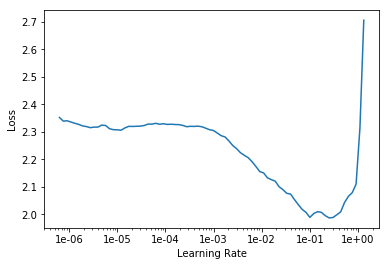

In [30]:
learn.recorder.plot()

We train by gradually unfreezing layers and then running an epoch each time, in accordance with the suggestions in the ULMFiT paper.

In [31]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.180001,1.089524,0.602817,03:31


In [32]:
learn.save('first')
# learn.load('first)

In [33]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.953430,0.882323,0.668374,04:13


In [34]:
learn.save('second')
# learn.load('second')

In [35]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.831976,0.786340,0.702177,06:00


In [36]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.747985,0.779622,0.711396,07:50
1,0.741750,0.746949,0.716773,07:35
2,0.644315,0.743321,0.715749,08:00


### Evaluate Performance on Test Set

In [ ]:
# test_df = pd.read_csv("Tweets_filtered_test.csv", encoding="utf-8")
# test_df['airline_sentiment'].value_counts().plot(kind='bar')

In [37]:
df_test['pred_sentiment'] = df_test['text'].apply(lambda row: str(learn.predict(row)[0]))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


NameError: name 'test_df' is not defined

In [38]:
df_test.head()

,label,text,pred_sentiment
28785,0,BACKGROUND: International and national travell...,0
3934,1,Abstract The tertiary structures of the S1 and...,3
5377,0,Abstract Background Since the initial descript...,0
2565,9,Next-generation sequencing is increasingly bei...,9
15519,4,Catheterized intestinal loops may be a valuabl...,4


In [59]:
print("Test Accuracy: ", accuracy_score(df_test['label'], df_test['pred_sentiment']))

Test Accuracy:  0.7259923175416133


In [58]:
df_test.head()

,label,text,pred_sentiment
0,0,BACKGROUND: International and national travell...,0
1,1,Abstract The tertiary structures of the S1 and...,3
2,0,Abstract Background Since the initial descript...,0
3,9,Next-generation sequencing is increasingly bei...,9
4,4,Catheterized intestinal loops may be a valuabl...,4


In [57]:
df_test.dtypes

label              int64
text              object
pred_sentiment     int64
dtype: object

In [43]:
df_test.to_csv('covid_test predictions.csv', index=False, encoding='utf-8')

In [45]:
preds = df_test['pred_sentiment'].tolist()

In [46]:
y_test = df_test['label'].tolist()

In [56]:
df_test = pd.read_csv('covid_test predictions.csv',encoding='utf-8',error_bad_lines=False,engine='python')

In [48]:
print(y_test)

[0, 1, 0, 9, 4, 6, 9, 0, 4, 4, 5, 8, 0, 5, 0, 1, 6, 0, 0, 6, 0, 1, 3, 5, 9, 6, 9, 5, 0, 5, 0, 4, 5, 0, 0, 3, 7, 4, 8, 0, 5, 0, 1, 0, 5, 1, 9, 6, 8, 7, 3, 8, 3, 3, 8, 0, 3, 4, 9, 2, 1, 4, 6, 1, 6, 6, 1, 9, 9, 8, 8, 5, 8, 0, 9, 6, 1, 8, 0, 0, 7, 7, 8, 8, 0, 7, 8, 4, 8, 9, 7, 4, 6, 7, 4, 9, 4, 8, 7, 0, 6, 0, 5, 1, 3, 3, 5, 0, 8, 6, 7, 0, 7, 4, 7, 4, 9, 7, 6, 8, 3, 8, 5, 5, 8, 7, 3, 9, 1, 8, 3, 5, 1, 9, 3, 8, 3, 4, 3, 5, 1, 5, 9, 7, 3, 3, 5, 0, 4, 0, 6, 8, 6, 8, 1, 1, 5, 3, 7, 9, 1, 5, 9, 6, 4, 9, 7, 8, 4, 6, 0, 5, 1, 4, 5, 3, 7, 0, 4, 0, 0, 1, 7, 5, 5, 4, 5, 3, 7, 4, 5, 6, 0, 8, 4, 5, 1, 8, 0, 8, 6, 8, 8, 0, 8, 0, 5, 7, 3, 6, 0, 1, 5, 3, 5, 1, 8, 4, 5, 1, 6, 1, 0, 5, 9, 3, 4, 8, 9, 5, 5, 4, 3, 7, 0, 5, 6, 6, 1, 8, 1, 2, 1, 9, 8, 7, 4, 8, 3, 7, 3, 5, 4, 1, 5, 0, 5, 6, 8, 4, 9, 4, 7, 6, 6, 7, 1, 3, 2, 3, 7, 8, 0, 9, 3, 3, 3, 8, 0, 0, 9, 5, 6, 4, 9, 7, 1, 3, 1, 0, 4, 8, 0, 3, 7, 6, 4, 9, 3, 0, 9, 0, 9, 3, 9, 5, 8, 7, 0, 6, 4, 5, 0, 0, 0, 8, 3, 0, 0, 0, 5, 0, 6, 0, 1, 7, 0, 2, 0, 1, 6, 8, 0, 

In [42]:
accuracy_score(df_test.label, df_test.pred_sentiment)

0.0

In [60]:
print(classification_report(df_test['label'], df_test['pred_sentiment']))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       582
           1       0.68      0.61      0.64       449
           2       0.94      1.00      0.97        34
           3       0.66      0.84      0.74       466
           4       0.71      0.53      0.61       350
           5       0.75      0.71      0.73       482
           6       0.63      0.60      0.61       429
           7       0.79      0.79      0.79       321
           8       0.75      0.77      0.76       405
           9       0.74      0.75      0.75       387

   micro avg       0.73      0.73      0.73      3905
   macro avg       0.75      0.75      0.74      3905
weighted avg       0.73      0.73      0.72      3905



In [44]:
learn.save('clas')

In [ ]:
test_df[:20]

Plot confusion matrix to see where the areas of misclassification are. 

In [ ]:
# Confusion matrix plotting adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(test_df['airline_sentiment'], test_df['pred_sentiment'], classes=['negative', 'neutral', 'positive'], title='Airline sentiment confusion matrix')
# confusion_matrix(test_df['airline_sentiment'], test_df['pred_sentiment'], labels=['positive', 'neutral', 'negative'])
plt.show()

From the confusion matrix, we can see that within True Negatives, the prediction accuracy is pretty high. The model has a very hard time classifying neutral tweets, and often misclassifies them as negative. For True Positives, the overall accuracy is pretty good but a surprisingly large number get classified as negative. Let's look at these in closer detail:

In [ ]:
test_df.loc[(test_df['airline_sentiment'] == 'positive') & (test_df['pred_sentiment'] == 'negative')]

It's not immediately clear what the common thread that led these tweets to be mislabelled but possible causes include missing signals from hastags, non-grammatical sentences, mis-spellings, etc. which generally contribute to the classification error. 

In the future, it would be good to spend more time on feature engineering and fitting the language model so that it's more suited to the vocabulary and style of language that is in tweets. From the language model and processing steps, we can see that the model accuracy is not very high and that, even as humans, it's hard to discern the sentiment from the post-processed / tokenized text. One possible way of addressing this issue is to use a much larger corpus of tweets when developing the language model. 